# Anonymization: Balancing the use of data in aggregate with protecting people’s privacy

## Pseudonymization: The removal of direct identifiers
1. We want a deterministic function (same inputs are always mapped to same
outputs).
2. We want the possible outputs to all have the same length (for simplicity)
3. We want collisions to be very unlikely (impossible is too much to ask).
4. We want a function that is fast to compute (i.e. for any input it’s easy to
compute its output, for simplicity).
5. We want a function that is computationally infeasible to invert (i.e. for anyoutput it’s hard to compute its input). A one-way function.

These are what a “cryptographic hash function” does (when we say “hash
function” in this class we mean cryptographic hash function).

### hash function
h(k) = ⎣m (k a –⎣k a⎦)⎦
with k the input and a and m constant.

https://docs.python.org/3/library/hashlib.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import zipcodes
from pprint import pprint 


from hashlib import blake2b
from hashlib import md5

In [5]:
# blake2b is a fast hash function with the possibility to add salt directly inside de call of the function
h = blake2b()
h.update(b'Hello world')
h.hexdigest()

'6ff843ba685842aa82031d3f53c48b66326df7639a63d128974c5c14f31a0f33343a8c65551134ed1ae0f2b0dd2bb495dc81039e3eeb0aa1bb0388bbeac29183'

In [6]:
# Fonctione présenté dans les slides du cours
def create_lookup_table(N):
    table = {}
    for id in range(10**N):
        h = md5(str(id).encode()).hexdigest()
        table[h] = id
    return table

In [7]:
create_lookup_table(1)

{'cfcd208495d565ef66e7dff9f98764da': 0,
 'c4ca4238a0b923820dcc509a6f75849b': 1,
 'c81e728d9d4c2f636f067f89cc14862c': 2,
 'eccbc87e4b5ce2fe28308fd9f2a7baf3': 3,
 'a87ff679a2f3e71d9181a67b7542122c': 4,
 'e4da3b7fbbce2345d7772b0674a318d5': 5,
 '1679091c5a880faf6fb5e6087eb1b2dc': 6,
 '8f14e45fceea167a5a36dedd4bea2543': 7,
 'c9f0f895fb98ab9159f51fd0297e236d': 8,
 '45c48cce2e2d7fbdea1afc51c7c6ad26': 9}

In [8]:
data = pd.read_csv("dataset.csv")
ids = data.head(10)["id"]

In [9]:
# J'ai essayé la fonction sur notre data set, ça a l'air pas mal ! 
h = blake2b(digest_size=32, salt=b'LINMA2472')
table = {}
for id in ids:
    id_byte = bytes(id, encoding='utf8')
    h.update(id_byte)
    table[id] = h.hexdigest()
table

{'Amelia Morrow': 'd2847521058786f0977d871e1d28dd3e19f26295bbcced0ba4eafb64e5940c42',
 'Lillian Cole': '3cf0d9de236313f2e3136ba18e046ada469a986f6828b5e46888289d289e30a8',
 'Lillian Simpson': '365218d17c0b0b4dc25d11c663cd1fdcbed5d080189682fda24006737d4fc3f5',
 'Avery Richards': '480bb709ee3709a1c42eb0d9de89f626594d72265e101bf326a03072c3f47e7c',
 'Sophia Alvarado': '261cd6318baf3f76475f207219a18059a32696e991600135308ea97cc99c1a91',
 'Maxwell Brock': 'd0cc541cc86a0b1487bc3dfee87e6bbaa8e4fc400c7bfa33227ea18c0fe3321a',
 'Taylor Harris': 'fd9b0997993b227858b8f04160891ec7e6d6b48e3df3bca463adb9f3bbfe37ed',
 'Declan Gomez': 'd8d5de53a2c20fd26235024469b57060ae2d160d3f9f5b5fe5584f1916c1dd43',
 'Connor Lynch': '305120f0526abbd042b5d184e0acbb53170aaafe140785183834b07bf7b79cb5',
 'Aurora Cole': '96ad4b0348f7d1346a61040a61b755329926e4ab580e186f061e2bd4f4885c21'}

In [10]:
def hash_ids(ids, salt=b'azerty', digest_size=32):
    """
    Function that return a list of 'hashed' ids
    Input : ids = list of string to hash
    salt=b'azerty' by default, max length=16 bytes
    digest_size=32 by default, max size = 64
    """
    h = blake2b(digest_size=digest_size, salt=salt)
    ids_hashed = []
    for id in ids:
        id_byte = bytes(id, encoding='utf8')
        h.update(id_byte)
        ids_hashed.append(h.hexdigest())
    return ids_hashed

In [11]:
data = pd.read_csv("dataset.csv")
ids = data["id"]
hashed_ids = hash_ids(ids)
data["id"] = hashed_ids

In [12]:
data.head(10)

,id,gender,dob,zipcode,education,employment,children,marital_status,ancestry,number_vehicles,commute_time,accommodation,disease
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,12/1950,26904,High School,Retired,2,married,Africa,2,0.0,Own house,Alzheimer's disease
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,4/1940,78088,PhD/md,Retired,1,married,Africa,1,0.0,Rent flat,multiple sclerosis
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,12/1966,51502,Bachelor,Employed,1,married,Asia,0,0.1,Rent flat,heart disease
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,4/1943,54080,Bachelor,Retired,1,married,Africa,0,0.0,Rent room,endometriosis
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,10/1947,68785,High School,Retired,1,married,Europe,0,0.0,Rent flat,gastritis
5,dce43f6f76bba6b938cf2661d41b0881b53ca2fd9b1c0b...,male,10/1933,75966,High School,Retired,2,married,Europe,1,0.0,Own house,endometriosis
6,2335f565feff86a18b685e3f361d29c33d2e4df9ecc6e5...,female,11/1942,32249,Bachelor,Retired,1,married,Asia,1,0.0,Own house,multiple sclerosis
7,28efa72f2ba129de0d30d09788e659a5c4a538b649fdbe...,male,12/1958,32582,High School,Retired,4,married,Oceania,1,0.0,Own house,HIV/AIDS
8,23f5760b824582719c1a84e76826f53e07c3fca2713348...,male,7/1964,96649,Masters,Employed,2,divorced,Africa,1,0.1,Own house,skin cancer
9,a4815a141d823c02f49c64ba732b14486504cda54a9940...,female,8/1947,93909,PhD/md,Retired,1,widowed,Oceania,1,0.0,Own flat,Alzheimer's disease


In [13]:
ds_hospital_creation = data[['id','gender', 'dob','zipcode','disease','ancestry']].copy()
ds_hospital_creation.head(1)

,id,gender,dob,zipcode,disease,ancestry
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,12/1950,26904,Alzheimer's disease,Africa


In [14]:
#chunk that reduces the zipcode to a partial zipcode composed by the three first digits of the original zipcode

ds_hospital_creation['partial zipcode'] = ds_hospital_creation.zipcode.astype(str).str[:2]

ds_hospital_creation.drop(['zipcode'], axis='columns', inplace=True)
ds_hospital_creation['partial zipcode'] = ds_hospital_creation['partial zipcode'].astype(str) + '***'

ds_hospital_creation.head(1)

,id,gender,dob,disease,ancestry,partial zipcode
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,12/1950,Alzheimer's disease,Africa,26***


In [15]:
#chunk qui laisse uniquement l'année de naissance 

ds_hospital_creation['year of birth'] = ds_hospital_creation['dob'].astype(str).str[-4:]


In [16]:
ds_hospital_creation.head(5)

,id,gender,dob,disease,ancestry,partial zipcode,year of birth
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,12/1950,Alzheimer's disease,Africa,26***,1950
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,4/1940,multiple sclerosis,Africa,78***,1940
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,12/1966,heart disease,Asia,51***,1966
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,4/1943,endometriosis,Africa,54***,1943
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,10/1947,gastritis,Europe,68***,1947


array([[<AxesSubplot:title={'center':'year of birth'}>]], dtype=object)

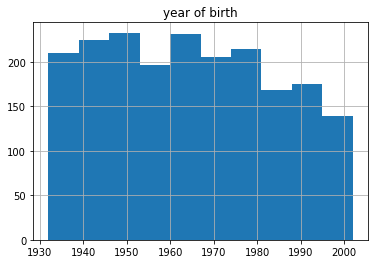

In [17]:
#histogramme des années de naissance pour vérifier la répartition
ds_hospital_creation['year of birth']=ds_hospital_creation['year of birth'].astype(int)
ds_hospital_creation.hist(column="year of birth")

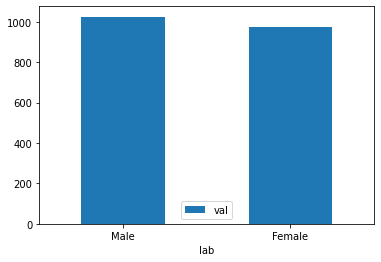

In [18]:
#Meme chose pour le gender 

df = pd.DataFrame({'lab':['Male', 'Female'], 'val':[1025, 975]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [19]:
#Chunk that transforms date of birth in decade of birth

ds_hospital_creation['partial_dob'] = ds_hospital_creation['dob'].astype(str).str[:-1]
ds_hospital_creation['partial_dob2'] = ds_hospital_creation['partial_dob'].astype(str).str[-3:]
ds_hospital_creation['partial_dob2'] =ds_hospital_creation['partial_dob2'].astype(str) +'0 s'
ds_hospital_creation.drop(['dob'], axis='columns', inplace=True)


ds_hospital_creation.head(5)


,id,gender,disease,ancestry,partial zipcode,year of birth,partial_dob,partial_dob2
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,Africa,26***,1950,12/195,1950 s
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,Africa,78***,1940,4/194,1940 s
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,Asia,51***,1966,12/196,1960 s
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,Africa,54***,1943,4/194,1940 s
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,Europe,68***,1947,10/194,1940 s


In [20]:
#Cleaning du dataframe

hospital_creation = ds_hospital_creation.rename(columns = {'partial_dob2': 'decade of birth'}, inplace = False)
hospital_creation.drop(['partial_dob'],axis='columns',inplace=True)

hospital_creation.head()



,id,gender,disease,ancestry,partial zipcode,year of birth,decade of birth
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,Africa,26***,1950,1950 s
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,Africa,78***,1940,1940 s
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,Asia,51***,1966,1960 s
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,Africa,54***,1943,1940 s
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,Europe,68***,1947,1940 s


In [21]:
#Chunk pour vérifier les maladies différentes qui sert pas à grand chose 

hospital_creation.disease.unique()

array(["Alzheimer's disease", 'multiple sclerosis', 'heart disease',
       'endometriosis', 'gastritis', 'HIV/AIDS', 'skin cancer',
       'hypertension', 'breast cancer', 'kidney disease', 'diabetes',
       'schizophrenia', 'prostate cancer'], dtype=object)

In [22]:
len(hospital_creation['partial zipcode'].unique())

90

In [23]:
hospital_creation.drop(['year of birth'],axis='columns',inplace=True)

hospital_creation.head(10)

,id,gender,disease,ancestry,partial zipcode,decade of birth
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,Africa,26***,1950 s
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,Africa,78***,1940 s
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,Asia,51***,1960 s
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,Africa,54***,1940 s
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,Europe,68***,1940 s
5,dce43f6f76bba6b938cf2661d41b0881b53ca2fd9b1c0b...,male,endometriosis,Europe,75***,1930 s
6,2335f565feff86a18b685e3f361d29c33d2e4df9ecc6e5...,female,multiple sclerosis,Asia,32***,1940 s
7,28efa72f2ba129de0d30d09788e659a5c4a538b649fdbe...,male,HIV/AIDS,Oceania,32***,1950 s
8,23f5760b824582719c1a84e76826f53e07c3fca2713348...,male,skin cancer,Africa,96***,1960 s
9,a4815a141d823c02f49c64ba732b14486504cda54a9940...,female,Alzheimer's disease,Oceania,93***,1940 s


In [24]:
#Chunk qui permet de voir toutes les lignes qui ont une copie selon les colones decade of birt,zipcode et gender, plus on se rapproche de 2000 mieux on est 

duplicateRows = hospital_creation[hospital_creation.duplicated(['decade of birth', 'partial zipcode','gender'],keep=False) ]

len(duplicateRows)

1548

In [25]:
print(duplicateRows[:10])

                                                   id  gender  \
0   768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...  female   
1   6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...  female   
2   cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...  female   
3   d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...  female   
5   dce43f6f76bba6b938cf2661d41b0881b53ca2fd9b1c0b...    male   
6   2335f565feff86a18b685e3f361d29c33d2e4df9ecc6e5...  female   
7   28efa72f2ba129de0d30d09788e659a5c4a538b649fdbe...    male   
8   23f5760b824582719c1a84e76826f53e07c3fca2713348...    male   
10  0fc9131a2aa7a5d8a92aca9cb684d26c11ff83d7e96939...  female   
11  838fdf1c5ec267e8117bf41ab66d51890a9bad7f802095...    male   

                disease ancestry partial zipcode decade of birth  
0   Alzheimer's disease   Africa           26***          1950 s  
1    multiple sclerosis   Africa           78***          1940 s  
2         heart disease     Asia           51***          1960 s  
3         endome

In [26]:
#On dégage les ancestry parce que je pense pas que ca serve à grand chose 
hospital_creation.drop(['ancestry'],axis='columns',inplace=True)

In [27]:
#créer un vecteur pour convertir zipcode en état pour passer de 90 zipcodes à 45 (j'espère)
state = []
for zipc in data['zipcode'].astype(str):
    a = zipcodes.matching(zipc)
    if not a:
        state.append(np.nan)
    else:
        b = a[0]
        c = b['state']
        state.append(c)  

In [313]:
print(state)

[nan, nan, 'IA', nan, 'NE', 'TX', nan, nan, 'AP', nan, nan, nan, 'OH', 'ND', nan, 'AR', nan, nan, nan, 'WV', nan, nan, 'MN', nan, nan, nan, nan, nan, 'PA', 'IN', nan, nan, nan, nan, nan, nan, 'TX', 'IL', nan, nan, 'MO', 'OR', 'NY', nan, nan, nan, 'WV', 'AZ', nan, 'TN', nan, 'OH', nan, 'WV', 'VA', nan, nan, 'VA', nan, nan, nan, 'VA', nan, 'MI', nan, nan, nan, nan, nan, 'PA', nan, 'NY', nan, 'IA', nan, 'OH', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'TN', nan, 'IA', nan, 'FL', 'SD', nan, 'NC', 'OR', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'TX', nan, nan, nan, nan, nan, nan, nan, 'DE', nan, 'MN', nan, nan, nan, nan, nan, nan, nan, 'FL', 'PA', nan, nan, 'UT', nan, nan, 'CA', nan, nan, 'KY', 'OK', 'VA', nan, 'TX', nan, nan, 'WI', nan, 'NY', nan, nan, nan, 'NY', nan, 'IL', nan, 'IA', 'OH', 'WA', nan, 'FL', 'PA', nan, nan, 'NC', nan, 'OH', 'PA', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'AK', nan, 'OH', nan, nan, 'PA', nan, 'MD', nan, nan, nan, nan, nan, 'IN', nan, n

In [28]:
def_states=[]
for i in data.zipcode.astype(str).str[:2]:
    a=zipcodes.similar_to(i)
    b=a[0]
    c=a[1]
    if b['state']==c['state']:
        def_states.append(b['state'])
        

In [29]:
len(def_states)
print(def_states)

['WV', 'TX', 'IA', 'WI', 'NE', 'TX', 'FL', 'FL', 'CA', 'CA', 'OK', 'IA', 'OH', 'ND', 'NY', 'LA', 'NE', 'CA', 'VA', 'WV', 'VA', 'UT', 'MN', 'WA', 'NC', 'MO', 'TX', 'OH', 'PA', 'IN', 'SC', 'WI', 'KY', 'TX', 'WY', 'AZ', 'TX', 'IL', 'UT', 'OK', 'MO', 'OR', 'NY', 'AA', 'CO', 'DC', 'WV', 'AZ', 'KY', 'TN', 'IA', 'OH', 'CA', 'WV', 'VA', 'NY', 'WY', 'VA', 'NY', 'NE', 'DC', 'VA', 'IA', 'MI', 'MO', 'AA', 'OR', 'GA', 'OH', 'PA', 'WV', 'NY', 'NE', 'IA', 'CO', 'OH', 'NY', 'WY', 'NY', 'TN', 'CO', 'MO', 'NM', 'TX', 'NY', 'KS', 'TN', 'CA', 'IA', 'NV', 'FL', 'SD', 'NY', 'NC', 'OR', 'NY', 'CA', 'AZ', 'FL', 'NY', 'TX', 'NM', 'NC', 'OR', 'CA', 'TX', 'AA', 'NM', 'NE', 'NV', 'MN', 'AZ', 'KS', 'PA', 'GA', 'MN', 'AL', 'IL', 'VA', 'KY', 'TX', 'TX', 'KS', 'FL', 'PA', 'MI', 'NM', 'UT', 'NM', 'AL', 'CA', 'IN', 'NY', 'KY', 'OK', 'VA', 'CA', 'TX', 'UT', 'TX', 'WI', 'WY', 'NY', 'IN', 'KS', 'WA', 'NY', 'MS', 'IL', 'MT', 'IA', 'OH', 'WA', 'CA', 'FL', 'PA', 'WY', 'WY', 'NC', 'NE', 'OH', 'PA', 'CA', 'NY', 'NE', 'TX', 'WV

In [30]:
hospital_creation['state']=def_states

In [31]:
hospital_creation.drop(['partial zipcode'],axis='columns',inplace=True)


In [32]:
hospital_creation.head(5)

,id,gender,disease,decade of birth,state
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,1950 s,WV
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,1940 s,TX
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,1960 s,IA
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,1940 s,WI
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,1940 s,NE


In [33]:
duplicateRows = hospital_creation[hospital_creation.duplicated(['decade of birth', 'state','gender'],keep=False) ]

len(duplicateRows)

1869

In [34]:
duplicateRows.head(5)

,id,gender,disease,decade of birth,state
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,1950 s,WV
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,1940 s,TX
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,1960 s,IA
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,1940 s,WI
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,1940 s,NE


In [35]:
final_dataset_hospitals=duplicateRows
final_dataset_hospitals.head(10)

,id,gender,disease,decade of birth,state
0,768d1a5f81d78235ef9ada30815bf0c2c87b26ae5a1ac5...,female,Alzheimer's disease,1950 s,WV
1,6c78ed178ed6ca5114c297973fbfaedd1b23300887fb45...,female,multiple sclerosis,1940 s,TX
2,cb21208609092da5322fdbdb6a3e26018500afa8f16cb4...,female,heart disease,1960 s,IA
3,d69531784d3a60fed7c33acd8019b0055038e4e0315a8c...,female,endometriosis,1940 s,WI
4,b083ca5d64492fceebf71428654cfe17ae2e2e740e56ef...,female,gastritis,1940 s,NE
5,dce43f6f76bba6b938cf2661d41b0881b53ca2fd9b1c0b...,male,endometriosis,1930 s,TX
6,2335f565feff86a18b685e3f361d29c33d2e4df9ecc6e5...,female,multiple sclerosis,1940 s,FL
7,28efa72f2ba129de0d30d09788e659a5c4a538b649fdbe...,male,HIV/AIDS,1950 s,FL
8,23f5760b824582719c1a84e76826f53e07c3fca2713348...,male,skin cancer,1960 s,CA
9,a4815a141d823c02f49c64ba732b14486504cda54a9940...,female,Alzheimer's disease,1940 s,CA


In [36]:
clusters = final_dataset_hospitals.groupby(['gender', 'decade of birth','state']).disease.apply(list)


In [37]:
print(clusters[76])

['gastritis', 'gastritis']


In [38]:
if len(set(clusters[0]))==2:
    print("lol")

lol


In [39]:
i=0
diversity=[]
while i<426:
    diversity.append(len(set(clusters[i])))
    i=1+i


In [40]:
print(diversity)

[2, 4, 6, 7, 3, 2, 4, 3, 6, 4, 4, 2, 2, 5, 5, 2, 6, 2, 3, 5, 4, 7, 2, 3, 2, 5, 4, 8, 4, 4, 3, 7, 3, 4, 2, 2, 2, 3, 2, 6, 2, 8, 2, 3, 4, 7, 5, 3, 3, 6, 3, 8, 2, 5, 5, 3, 4, 4, 4, 2, 5, 4, 3, 4, 4, 3, 3, 3, 4, 2, 4, 4, 4, 2, 2, 2, 1, 6, 5, 4, 2, 3, 5, 2, 6, 3, 4, 2, 3, 2, 3, 8, 3, 3, 3, 4, 8, 6, 3, 5, 3, 2, 5, 5, 3, 3, 2, 6, 4, 2, 6, 2, 3, 5, 7, 2, 4, 6, 3, 2, 6, 1, 4, 6, 3, 2, 6, 5, 4, 3, 4, 4, 2, 2, 2, 2, 2, 4, 5, 5, 2, 4, 6, 3, 5, 2, 4, 3, 3, 1, 3, 6, 2, 3, 5, 2, 4, 3, 4, 2, 2, 3, 2, 4, 2, 9, 4, 4, 4, 2, 5, 3, 3, 3, 2, 3, 2, 2, 4, 3, 6, 2, 2, 2, 3, 4, 5, 2, 1, 4, 5, 5, 2, 2, 5, 4, 3, 2, 3, 2, 1, 1, 4, 1, 2, 2, 6, 3, 2, 3, 5, 2, 3, 2, 2, 5, 2, 2, 3, 2, 4, 2, 2, 2, 3, 3, 2, 5, 2, 3, 7, 3, 4, 4, 4, 3, 4, 9, 3, 4, 3, 4, 3, 3, 2, 5, 3, 2, 5, 5, 3, 2, 6, 2, 4, 9, 4, 5, 3, 2, 2, 2, 3, 3, 6, 3, 3, 4, 3, 2, 3, 2, 8, 2, 2, 4, 2, 4, 4, 3, 4, 2, 2, 2, 3, 6, 4, 3, 2, 5, 2, 5, 3, 3, 2, 5, 4, 5, 5, 3, 4, 4, 2, 5, 5, 6, 3, 2, 5, 5, 4, 4, 4, 2, 4, 5, 2, 2, 2, 4, 4, 4, 2, 5, 5, 4, 7, 5, 9, 2, 5, 5, 2, 

In [41]:
non_diverse_clusters = [i for i, e in enumerate(diversity) if e == 1]

In [42]:
print(non_diverse_clusters)

[76, 121, 149, 188, 200, 201, 203, 387, 403, 404]
